<a href="https://colab.research.google.com/github/casanchez25/turn_selection_classification/blob/main/Cantidad_de_Vueltas_Completa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [25.00, 10]


In [ ]:
data_path = '/content/drive/MyDrive/db/M_C_P_DATA.xlsx'
df= pd.read_excel(data_path, sheet_name='Densimetrica')

In [ ]:
df.drop(columns=['Observaciones'], inplace=True)
df.dropna(inplace=True) #Comentarios

In [ ]:
df.nunique()

Orden                   485
Preparación              25
Calidad                  31
QQs Netos               509
Línea                     3
Fecha                   228
Turno                     4
Analista                 11
Operador                 17
Hora                     76
% entrada\n(Trillo)     214
Def. Prim.               54
Def. Dens.               42
Def. Otros              136
Total Def.              335
% de salida             363
Def. Prim..1             65
Def. Dens..1             41
Def. Otros.1            160
Total Def..1            371
% de salida.1           388
Def. Prim..2            124
Def. Dens..2             62
Def. Otros.2            315
Total Def..2            682
% de salida.2           654
Prom % de salida       2026
Prom % de Pérdida      2296
Vueltas Ponderadas      355
dtype: int64

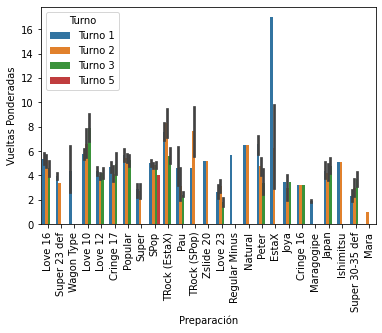

In [ ]:
sns.barplot(data=df, x='Preparación', y='Vueltas Ponderadas', hue='Turno')
plt.xticks(rotation=90)
plt.show()

In [ ]:
columns = df.columns.to_list()
columns[0:11]

['Orden',
 'Preparación',
 'Calidad',
 'QQs Netos',
 'Línea',
 'Fecha',
 'Turno',
 'Analista',
 'Operador',
 'Hora',
 '% entrada\n(Trillo)']

In [ ]:
columns[0:11]

['Orden',
 'Preparación',
 'Calidad',
 'QQs Netos',
 'Línea',
 'Fecha',
 'Turno',
 'Analista',
 'Operador',
 'Hora',
 '% entrada\n(Trillo)']

In [ ]:
df1=df[columns[0:11]+['Vueltas Ponderadas']]
df1.drop(columns=['Orden'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1.rename(columns={'% entrada\n(Trillo)':'%entrada'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Adding Date & Time values

In [ ]:
#df1['Hora']=df1['Hora'].astype(str)
#df1['H']=df1['Hora'].astype(str).apply(lambda x: x.split(':')[0])
#df1['minutes']=df1['Hora'].astype(str).apply(lambda x: x.split(':')[1])
df1.drop(columns=['Hora'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
def date_feats(df1):
  df1['month']=df1['Fecha'].dt.month
  df1['year']=df1['Fecha'].dt.year
  df1['day']=df1['Fecha'].dt.day
  df1['week']=df1['Fecha'].dt.week
  df1['weekday']=df1['Fecha'].dt.dayofweek
  df1['yearday']=df1['Fecha'].dt.dayofyear
  df1['quarter']=df1['Fecha'].dt.quarter
  df1['start_month']=df1['Fecha'].dt.is_month_start
  df1['end_month']=df1['Fecha'].dt.is_month_end
  df1['start_month']=df1['start_month'].apply(lambda x: 1 if True else 0)
  df1['end_month']=df1['end_month'].apply(lambda x: 1 if True else 0)
  df1.drop(columns=['Fecha'], inplace=True)
  return df1

In [ ]:
df1= date_feats(df1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

# Labeling


In [ ]:
df1

,Preparación,Calidad,QQs Netos,Línea,Turno,Analista,Operador,%entrada,Vueltas Ponderadas,month,year,day,week,weekday,yearday,quarter,start_month,end_month
0,Love 16,Lift Leve,973.54,Línea 2,Turno 1,Juan S.,Michael,0.061,7.512796,10,2020,5,41,0,279,4,1,1
1,Love 16,Lift Leve,973.54,Línea 2,Turno 1,Juan S.,Michael,0.060,7.512796,10,2020,6,41,1,280,4,1,1
2,Love 16,Lift Leve,973.54,Línea 2,Turno 1,Juan S.,Michael,0.059,7.512796,10,2020,6,41,1,280,4,1,1
3,Love 16,Lift Leve,973.54,Línea 2,Turno 1,Juan S.,Michael,0.074,7.512796,10,2020,6,41,1,280,4,1,1
4,Love 16,Lift Leve,973.54,Línea 2,Turno 1,Juan S.,Michael,0.081,7.512796,10,2020,7,41,2,281,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,Wagon Type,Lift,428.65,Línea 2,Turno 1,Juan S.,Michaell F,0.076,3.000000,8,2021,27,34,4,239,3,1,1
2344,Wagon Type,Lift,428.65,Línea 2,Turno 1,Juan S.,Michaell F,0.116,3.000000,8,2021,28,34,5,240,3,1,1
2345,Wagon Type,DamLeve,834.91,Línea 2,Turno 1,Juan S.,Michaell F,0.076,2.000000,8,2021,28,34,5,240,3,1,1
2346,Wagon Type,DamLeve,834.91,Línea 2,Turno 1,Juan S.,Michaell F,0.061,2.000000,8,2021,28,34,5,240,3,1,1


In [ ]:
def label_encoding(df1):
  #Operador labeling
  operador_list =df1['Operador'].unique()
  operador_dict = {operador_list[i]:i for i in range(len(operador_list))}
  df1['Operador']=df1['Operador'].apply(lambda x: operador_dict.get(x))

  #Preparación labeling
  preparacion_list =df1['Preparación'].unique()
  preparacion_dict = {preparacion_list[i]:i for i in range(len(preparacion_list))}
  df1['Preparación']=df1['Preparación'].apply(lambda x: preparacion_dict.get(x))

  #Calidad labels
  calidad_list =df1['Calidad'].unique()
  calidad_dict = {calidad_list[i]:i for i in range(len(calidad_list))}
  df1['Calidad']=df1['Calidad'].apply(lambda x: calidad_dict.get(x))

  #Analista labeling
  analista_list =df1['Analista'].unique()
  analista_dict = {analista_list[i]:i for i in range(len(analista_list))}
  df1['Analista']=df1['Analista'].apply(lambda x: analista_dict.get(x))

  #Turno Labeling
  turno_list =df1['Turno'].unique()
  turno_dict = {turno_list[i]:i for i in range(len(turno_list))}
  df1['Turno']=df1['Turno'].apply(lambda x: turno_dict.get(x))

  #Línea Labeling
  linea_list =df1['Línea'].unique()
  linea_dict = {linea_list[i]:i for i in range(len(linea_list))}
  df1['Línea']=df1['Línea'].apply(lambda x: linea_dict.get(x))

  return df1


In [ ]:
df1 = label_encoding(df1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
#df1=df1[['Preparación', 'Calidad', 'Línea', 'Turno','Analista','Operador', 'H', 'minutes','month','day','week','weekday','yearday','quarter','start_month','end_month','QQs Netos', '%entrada', 'Vueltas Ponderadas']]
df1=df1[['Preparación', 'Calidad', 'Línea', 'Turno','Analista','Operador','month','day','week','weekday','yearday','quarter','start_month','end_month','QQs Netos', '%entrada', 'Vueltas Ponderadas']]

In [ ]:
df1['Vueltas Ponderadas']=df1['Vueltas Ponderadas'].apply(lambda x: round(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1['QQs Netos']=df1['QQs Netos'].apply(lambda x: np.nan if x =='30.10.94' else x) #Registry error. It was found meanwhile training the algorithm
df1['QQs Netos']=df1['QQs Netos'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Verifying the output distribution

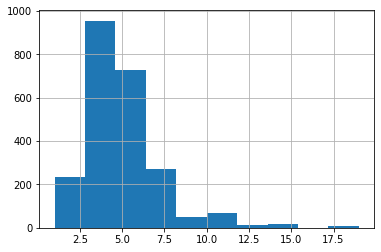

In [ ]:
df1['Vueltas Ponderadas'].hist()

We can drop the output beyond 12, because they are considered outliers in the company

In [ ]:
df1['Vueltas Ponderadas']=df1['Vueltas Ponderadas'].apply(lambda x: np.nan if x > 12 else x)
df1.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
#sns.pairplot(df1, hue='Vueltas Ponderadas')

# Splitting Test Values

In [ ]:
#Sampling 15% of dataset for testing
df_test=df1.sample(frac=.15)
df1.loc[df_test.index]=np.nan
df_train = df1.dropna()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_test

,Preparación,Calidad,Línea,Turno,Analista,Operador,month,day,week,weekday,yearday,quarter,start_month,end_month,QQs Netos,%entrada,Vueltas Ponderadas
258,8,9,1,0,4,9,12,31,53,3,366,4,1,1,3068.16,0.051,3.0
770,6,7,0,1,4,7,2,13,6,5,44,1,1,1,1810.02,0.064,5.0
676,3,4,0,0,4,7,2,5,5,4,36,1,1,1,2046.35,0.090,6.0
1083,8,14,1,1,4,9,3,24,12,2,83,1,1,1,3068.14,0.074,5.0
2115,21,23,0,2,9,16,6,19,24,5,170,2,1,1,2546.50,0.240,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,9,8,0,0,6,8,5,8,18,5,128,2,1,1,1405.60,0.100,8.0
787,6,7,0,0,7,11,2,15,7,0,46,1,1,1,2375.14,0.055,7.0
698,5,4,1,1,4,9,2,8,6,0,39,1,1,1,3500.00,0.057,3.0
832,8,14,0,2,4,7,2,18,7,3,49,1,1,1,3181.03,0.078,4.0


In [ ]:
t_labels = df_train['Vueltas Ponderadas']
test_labels =df_test['Vueltas Ponderadas']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_train.drop(columns=['Vueltas Ponderadas']))

In [ ]:
test_scaled =scaler.transform(df_test.drop(columns=['Vueltas Ponderadas']))

In [ ]:
df_scaled=pd.DataFrame(df_scaled, columns=df_train.drop(columns=['Vueltas Ponderadas']).columns)

# Splitting and modeling

In [ ]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_labels, val_labels = train_test_split(df_scaled, t_labels, train_size = 0.85, random_state=42)

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

lgb_params = {
              'num_leaves': range(7,100),
              'max_bin': range(50,120),
              'bagging_freq': range(3,20),
              
              'n_estimators': range(80,200),
              'reg_lambda':np.linspace(0,1, num=20),
              'learning_rate': np.linspace(0.001,0.1, num=25),
              'feature_fraction': np.linspace(0.001, 0.8, num=25),
              'max_depth': range(20,400),
              
              #'boosting_type': ['gbdt', 'dart', 'goss']
              }
              

model = lgb.LGBMClassifier()
#cv_model = RandomizedSearchCV(model, lgb_params, cv=10)               
#Once the best params were obtained from Randomized Search CV, it won't be required anymore

In [ ]:
#cv_model.fit(train_data, train_labels, eval_set=(val_data, val_labels), verbose=0)

In [ ]:
#cv_model.best_params_

In [ ]:
#cv_model.best_score_

In [ ]:
best_params={'bagging_freq': 6,
 'feature_fraction': 0.6335416666666668,
 'learning_rate': 0.079375,
 'max_bin': 95,
 'max_depth': 187,
 'n_estimators': 165,
 'num_leaves': 65,
 'reg_lambda': 0.3157894736842105}

In [ ]:
model.set_params(**best_params)
model.fit(train_data, train_labels, eval_set=[(val_data, val_labels),(train_data, train_labels)], verbose=0)

LGBMClassifier(bagging_freq=6, feature_fraction=0.6335416666666668,
               learning_rate=0.079375, max_bin=95, max_depth=187,
               n_estimators=165, num_leaves=65, reg_lambda=0.3157894736842105)

In [ ]:
pred= model.predict(val_data)

## Model Score

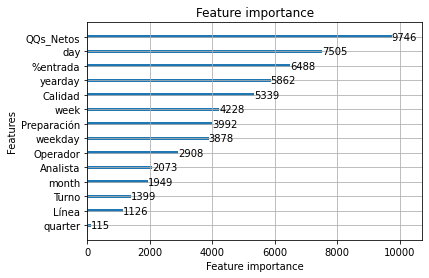

In [ ]:
lgb.plot_importance(model)

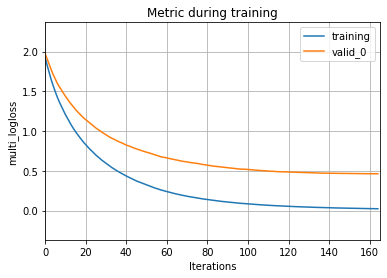

In [ ]:
lgb.plot_metric(model)

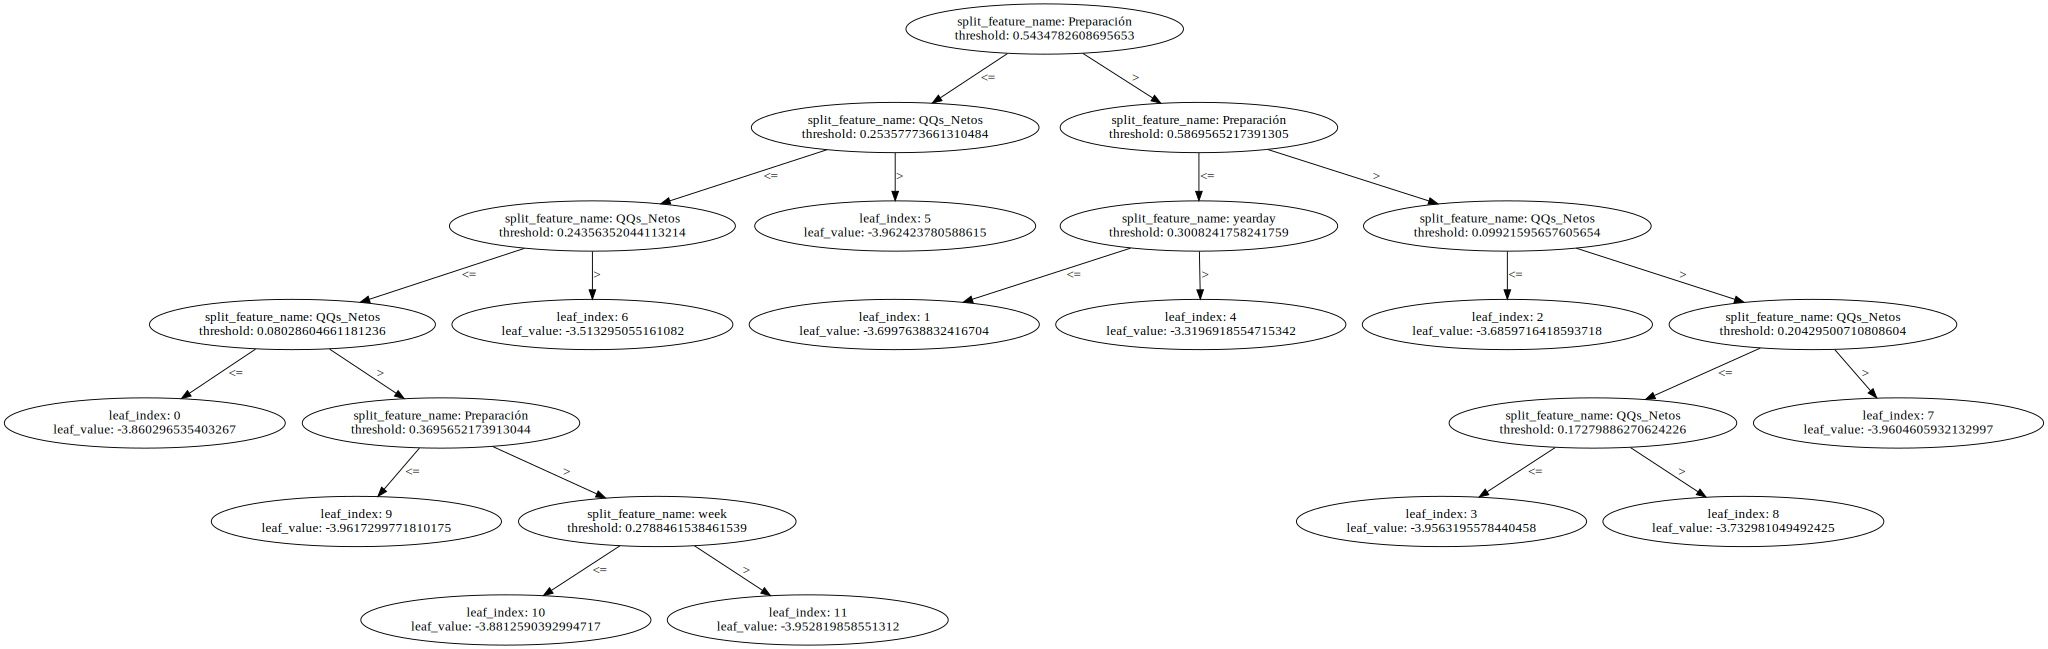

In [ ]:
lgb.create_tree_digraph(model)

In [ ]:
model.score(val_data, val_labels)

0.864406779661017

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(val_labels, pred)

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  3,  0,  0,  2,  0,  0,  0],
       [ 0,  0, 46,  2,  4,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4, 56,  4,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  1, 50,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  1, 32,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  1, 23,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0, 12,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  4]])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(val_labels, pred)

0.864406779661017

In [ ]:
from sklearn.metrics import f1_score

f1_score(val_labels, pred, average='weighted')

0.8651822237435974

# Final Test

In [ ]:
pred_test = model.predict(test_scaled)

confusion_matrix(test_labels, pred_test)

array([[ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 21,  0,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1, 65,  0,  6,  1,  0,  1,  0,  0,  0],
       [ 0,  0,  3, 77,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 61,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  1, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  2,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0]])

In [ ]:
accuracy_score(test_labels, pred_test)

0.9219653179190751

In [ ]:
f1_score(test_labels, pred_test, average='weighted')

0.9182862609242526